# Data analysis



## Fit a line to numerical data



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/04/fit-a-line-to-numerical-data/)

We want to fit a line to this data:



In [20]:
x = [0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10]
y = [0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147]

We use the polyfit(x, y, n) command where n is the polynomial order, n=1 for a line.



In [21]:
import numpy as np

p = np.polyfit(x, y, 1)
print(p)
slope, intercept = p
print(slope, intercept)

[-0.31452218  0.00062457]
-0.31452218430034123 0.000624573378839847


To show the fit, we can use numpy.polyval to evaluate the fit at many points.



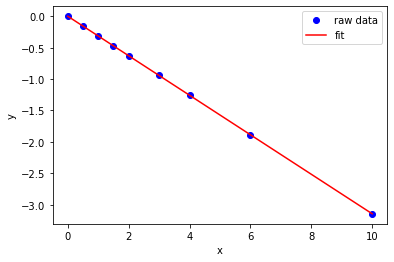

In [22]:
import matplotlib.pyplot as plt

xfit = np.linspace(0, 10)
yfit = np.polyval(p, xfit)

plt.plot(x, y, 'bo', label='raw data')
plt.plot(xfit, yfit, 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Linear least squares fitting with linear algebra



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/24/linear-least-squares-fitting-with-linear-algebra/)

The idea here is to formulate a set of linear equations that is easy to solve. We  can express the equations in terms of our unknown fitting parameters $p_i$ as:

    x1^0*p0 + x1*p1 = y1
    x2^0*p0 + x2*p1 = y2
    x3^0*p0 + x3*p1 = y3
    etc...

Which we write in matrix form as $A p = y$ where $A$ is a matrix of column vectors, e.g. [1, x\_i]. $A$ is not a square matrix, so we cannot solve it as written. Instead, we form $A^T A p = A^T y$ and solve that set of equations.



0.000624573378839699 -0.31452218430034123
0.000624573378839699 -0.3145221843003413


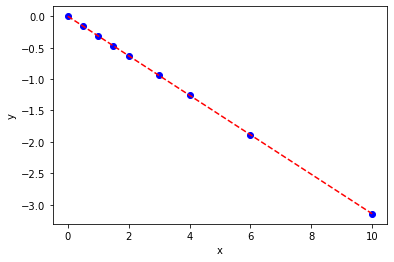

In [23]:
import numpy as np
x = np.array([0, 0.5, 1, 1.5, 2.0, 3.0, 4.0, 6.0, 10])
y = np.array([0, -0.157, -0.315, -0.472, -0.629, -0.942, -1.255, -1.884, -3.147])

A = np.column_stack([x**0, x])

M = np.dot(A.T, A)
b = np.dot(A.T, y)

i1, slope1 = np.dot(np.linalg.inv(M), b)
i2, slope2 = np.linalg.solve(M, b) # an alternative approach.

print(i1, slope1)
print(i2, slope2)

# plot data and fit
import matplotlib.pyplot as plt

plt.plot(x, y, 'bo')
plt.plot(x, np.dot(A, [i1, slope1]), 'r--')
plt.xlabel('x')
plt.ylabel('y');

This method can be readily extended to fitting any polynomial model, or other linear model that is fit in a least squares sense. This method does not provide confidence intervals.



## Linear regression with confidence intervals (updated)



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/28/linear-regression-with-confidence-intervals/)

Fit a fourth order polynomial to this data and determine the confidence interval for each parameter. Data from example 5-1 in Fogler, Elements of Chemical Reaction Engineering.

We want the equation $Ca(t) = b0 + b1*t + b2*t^2 + b3*t^3 + b4*t^4$ fit to the data in the least squares sense. We can write this in a linear algebra form as: T\*p = Ca where T is a matrix of columns [1 t t^2 t^3 t^4], and p is a column vector of the fitting parameters. We want to solve for the p vector and estimate the confidence intervals.

`pycse` now has a regress function similar to Matlab. That function just uses the code in the next example (also seen [here](http://jkitchin.github.io/blog/2013/02/18/Linear-regression-with-confidence-intervals/)).



In [24]:
from pycse import regress
import numpy as np
time = np.array([0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0])
Ca = np.array([50.0, 38.0, 30.6, 25.6, 22.2, 19.5, 17.4])*1e-3

T = np.column_stack([time**0, time, time**2, time**3, time**4])

alpha = 0.05
p, pint, se = regress(T, Ca, alpha)
print(pint)

[[ 4.90747573e-02  5.09057618e-02]
 [-3.49867288e-04 -2.45825349e-04]
 [ 5.40268309e-07  2.14670134e-06]
 [-7.67338627e-09  7.03689514e-10]
 [-3.23368759e-12  1.06276267e-11]]


## Linear regression with confidence intervals.



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/28/linear-regression-with-confidence-intervals/)

Fit a fourth order polynomial to this data and determine the confidence interval for each parameter. Data from example 5-1 in Fogler, Elements of Chemical Reaction Engineering.

We want the equation $Ca(t) = b0 + b1*t + b2*t^2 + b3*t^3 + b4*t^4$ fit to the data in the least squares sense. We can write this in a linear algebra form as: T\*p = Ca where T is a matrix of columns [1 t t^2 t^3 t^4], and p is a column vector of the fitting parameters. We want to solve for the p vector and estimate the confidence intervals.



 5.00e-02 [ 4.9680e-02  5.0300e-02]
-2.98e-04 [-3.1546e-04 -2.8023e-04]
 1.34e-06 [ 1.0715e-06  1.6155e-06]
-3.48e-09 [-4.9032e-09 -2.0665e-09]
 3.70e-12 [ 1.3501e-12  6.0439e-12]
R^2 = 0.9999869672459537


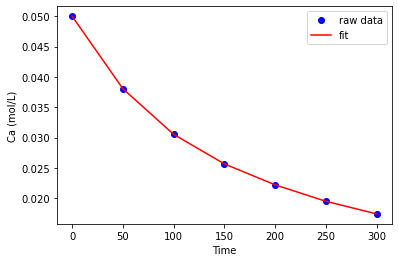

In [25]:
import numpy as np
from scipy.stats.distributions import  t

time = np.array([0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0])
Ca = np.array([50.0, 38.0, 30.6, 25.6, 22.2, 19.5, 17.4])*1e-3

T = np.column_stack([time**0, time, time**2, time**3, time**4])

p, res, rank, s = np.linalg.lstsq(T, Ca, rcond=None)
# the parameters are now in p

# compute the confidence intervals
n = len(Ca)
k = len(p)

sigma2 = np.sum((Ca - np.dot(T, p))**2) / (n - k)  # RMSE

C = sigma2 * np.linalg.inv(np.dot(T.T, T)) # covariance matrix
se = np.sqrt(np.diag(C)) # standard error

alpha = 0.05 # 100*(1 - alpha) confidence level

sT = t.ppf(1.0 - alpha/2.0, n - k) # student T multiplier
CI = sT * se

for beta, ci in zip(p, CI):
    print('{2: 1.2e} [{0: 1.4e} {1: 1.4e}]'.format(beta - ci, beta + ci, beta))

SS_tot = np.sum((Ca - np.mean(Ca))**2)
SS_err = np.sum((np.dot(T, p) - Ca)**2)

#  http://en.wikipedia.org/wiki/Coefficient_of_determination
Rsq = 1 - SS_err/SS_tot
print('R^2 = {0}'.format(Rsq))

# plot fit
import matplotlib.pyplot as plt
plt.plot(time, Ca, 'bo', label='raw data')
plt.plot(time, np.dot(T, p), 'r-', label='fit')
plt.xlabel('Time')
plt.ylabel('Ca (mol/L)')
plt.legend(loc='best');

A fourth order polynomial fits the data well, with a good R^2 value. All of the parameters appear to be significant, i.e. zero is not included in any of the parameter confidence intervals. This does not mean this is the best model for the data, just that the model fits well.



## Nonlinear curve fitting



Here is a typical nonlinear function fit to data. you need to provide an initial guess. In this example we fit the Birch-Murnaghan equation of state to energy vs. volume data from density functional theory calculations.



Fitted parameters = [-56.46839641   0.57233217   2.7407944   16.55905648]


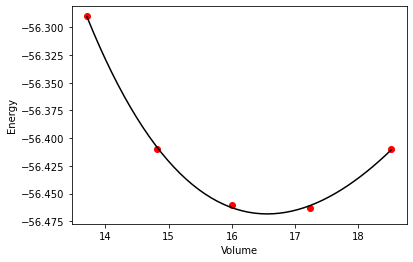

In [26]:
from scipy.optimize import leastsq
import numpy as np

vols = np.array([13.71, 14.82, 16.0, 17.23, 18.52])

energies = np.array([-56.29, -56.41, -56.46, -56.463, -56.41])

def Murnaghan(parameters, vol):
    'From Phys. Rev. B 28, 5480 (1983)'
    E0, B0, BP, V0 = parameters

    E = E0 + B0 * vol / BP * (((V0 / vol)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1.0)

    return E

def objective(pars, y, x):
    #we will minimize this function
    err =  y - Murnaghan(pars, x)
    return err

x0 = [ -56.0, 0.54, 2.0, 16.5] #initial guess of parameters

plsq = leastsq(objective, x0, args=(energies, vols))

print('Fitted parameters = {0}'.format(plsq[0]))

import matplotlib.pyplot as plt
plt.plot(vols,energies, 'ro')

#plot the fitted curve on top
x = np.linspace(min(vols), max(vols), 50)
y = Murnaghan(plsq[0], x)
plt.plot(x, y, 'k-')
plt.xlabel('Volume')
plt.ylabel('Energy');

See additional examples at \url{http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html}.



## Nonlinear curve fitting by direct least squares minimization



Here is an example of fitting a nonlinear function to data by direct minimization of the summed squared error.



Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 137
         Function evaluations: 240
parameters = [-56.46932645   0.59141447   1.9044796   16.59341303]


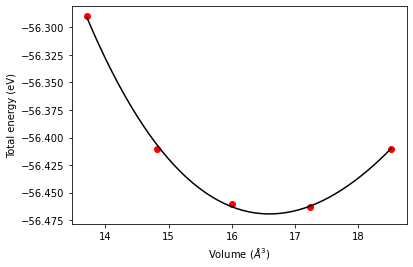

In [27]:
from scipy.optimize import fmin
import numpy as np

volumes = np.array([13.71, 14.82, 16.0, 17.23, 18.52])

energies = np.array([-56.29, -56.41, -56.46, -56.463,-56.41])

def Murnaghan(parameters,vol):
    'From PRB 28,5480 (1983'
    E0 = parameters[0]
    B0 = parameters[1]
    BP = parameters[2]
    V0 = parameters[3]

    E = E0 + B0*vol/BP*(((V0/vol)**BP)/(BP-1)+1) - V0*B0/(BP-1.)

    return E

def objective(pars,vol):
    #we will minimize this function
    err =  energies - Murnaghan(pars,vol)
    return np.sum(err**2) #we return the summed squared error directly

x0 = [ -56., 0.54, 2., 16.5] #initial guess of parameters

plsq = fmin(objective,x0,args=(volumes,)) #note args is a tuple

print('parameters = {0}'.format(plsq))

import matplotlib.pyplot as plt
plt.plot(volumes,energies,'ro')

#plot the fitted curve on top
x = np.linspace(min(volumes),max(volumes),50)
y = Murnaghan(plsq,x)
plt.plot(x,y,'k-')
plt.xlabel('Volume ($\AA^3$)')
plt.ylabel('Total energy (eV)');

## Parameter estimation by directly minimizing summed squared errors



[Matlab post](http://matlab.cheme.cmu.edu/2011/10/10/nonlinearfit_minsse-m/)



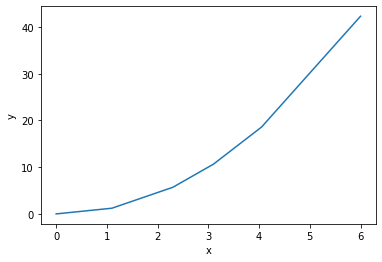

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0,       1.1,       2.3,      3.1,       4.05,      6.0])
y = np.array([0.0039,    1.2270,    5.7035,   10.6472,   18.6032,   42.3024])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y');

We are going to fit the function $y = x^a$ to the data. The best $a$ will minimize the summed squared error between the model and the fit.



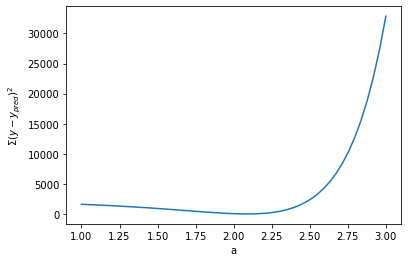

In [29]:
def errfunc_(a):
    return np.sum((y - x**a)**2)

errfunc = np.vectorize(errfunc_)

arange = np.linspace(1, 3)
sse = errfunc(arange)

plt.figure()
plt.plot(arange, sse)
plt.xlabel('a')
plt.ylabel('$\Sigma (y - y_{pred})^2$');

Based on the graph above, you can see a minimum in the summed squared error near $a = 2.1$. We use that as our initial guess. Since we know the answer is bounded, we use scipy.optimize.fminbound



2.0900483893314967


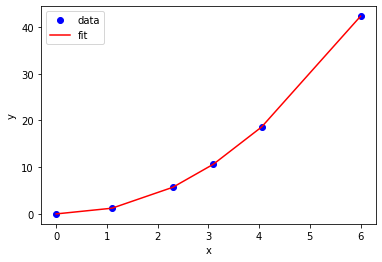

In [30]:
from scipy.optimize import fminbound

amin = fminbound(errfunc, 1.0, 3.0)

print(amin)

plt.figure()
plt.plot(x, y, 'bo', label='data')
plt.plot(x, x**amin, 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

We can do nonlinear fitting by directly minimizing the summed squared error between a model and data. This method lacks some of the features of other methods, notably the simple ability to get the confidence interval. However, this method is flexible and may offer more insight into how the solution depends on the parameters.



## Nonlinear curve fitting with parameter confidence intervals



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/29/nonlinear-curve-fitting-with-parameter-confidence-intervals/)

We often need to estimate parameters from nonlinear regression of data. We should also consider how good the parameters are, and one way to do that is to consider the confidence interval. A confidence interval tells us a range that we are confident the true parameter lies in.

In this example we use a nonlinear curve-fitting function: scipy.optimize.curve\_fit to give us the parameters in a function that we define which best fit the data. The scipy.optimize.curve\_fit function also gives us the [covariance](http://en.wikipedia.org/wiki/Covariance_matrix) matrix which we can use to estimate the standard error of each parameter. Finally,  we modify the standard error by a student-t value which accounts for the additional uncertainty in our estimates due to the small number of data points we are fitting to.

We will fit the function $y = a x / (b + x)$ to some data, and compute the 95% confidence intervals on the parameters.



p0: 1.3275314145379786 [1.3005365921998688  1.3545262368760884]
p1: 0.026461556970080666 [0.023607653829234403  0.02931546011092693]


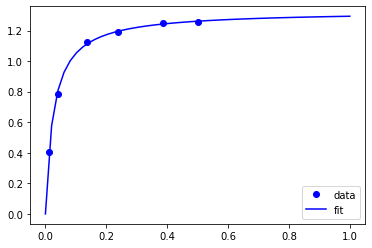

In [31]:
# Nonlinear curve fit with confidence interval
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# this is the function we want to fit to our data
def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, x, y, p0=initial_guess)

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(y)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof)

for i, p,var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    print('p{0}: {1} [{2}  {3}]'.format(i, p,
                                        p - sigma*tval,
                                        p + sigma*tval))

import matplotlib.pyplot as plt
plt.plot(x,y,'bo ')
xfit = np.linspace(0,1)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'b-')

plt.legend(['data','fit'],loc='best');

You can see by inspection that the fit looks pretty reasonable. The parameter confidence intervals are not too big, so we can be pretty confident of their values.



## Nonlinear curve fitting with confidence intervals



Our goal is to fit this equation to data $y = c1 exp(-x) + c2*x$ and compute the confidence intervals on the parameters.

This is actually could be a linear regression problem, but it is convenient to illustrate the  use the nonlinear fitting routine because it makes it easy to get
confidence intervals for comparison. The basic idea is to use the covariance matrix returned from the nonlinear fitting routine to estimate the student-t corrected confidence interval.



c0: 4.967139664393268 [4.626744765672402  5.3075345631141335]
c1: 2.1099511262769086 [1.7671162242697824  2.452786028284035]


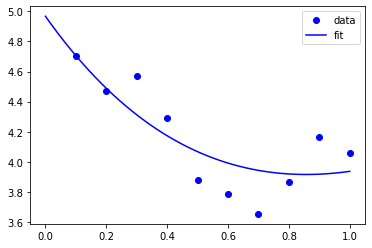

In [32]:
# Nonlinear curve fit with confidence interval
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t

x = np.array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
y = np.array([ 4.70192769,  4.46826356,  4.57021389,  4.29240134,  3.88155125,
	       3.78382253,  3.65454727,  3.86379487,  4.16428541,  4.06079909])

# this is the function we want to fit to our data
def func(x,c0, c1):
    return c0 * np.exp(-x) + c1*x

pars, pcov = curve_fit(func, x, y, p0=[4.96, 2.11])

alpha = 0.05 # 95% confidence interval

n = len(y)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n-p) # number of degrees of freedom

tval = t.ppf(1.0 - alpha / 2.0, dof) # student-t value for the dof and confidence level

for i, p,var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    print('c{0}: {1} [{2}  {3}]'.format(i, p,
					p - sigma*tval,
                                        p + sigma*tval))

import matplotlib.pyplot as plt
plt.plot(x,y,'bo ')
xfit = np.linspace(0,1)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'b-')
plt.legend(['data','fit'],loc='best');

## Graphical methods to help get initial guesses for multivariate nonlinear regression



[Matlab post](http://matlab.cheme.cmu.edu/2011/10/09/graphical-methods-to-help-get-initial-guesses-for-multivariate-nonlinear-regression/)

Fit the model f(x1,x2; a,b) = a\*x1 + x2^b to the data given below. This model has two independent variables, and two parameters.

We want to do a nonlinear fit to find a and b that minimize the summed squared errors between the model predictions and the data. With only two variables, we can graph how the summed squared error varies with the parameters, which may help us get initial guesses. Let us assume the parameters lie in a range, here we choose 0 to 5. In other problems you would adjust this as needed.



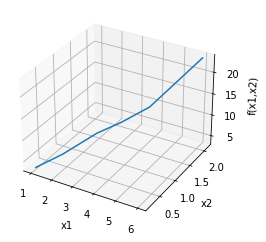

In [33]:
import numpy as np

import matplotlib.pyplot as plt

x1 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
x2 = [0.2, 0.4, 0.8, 0.9, 1.1, 2.1]
X = np.column_stack([x1, x2]) # independent variables

f = [ 3.3079,    6.6358,   10.3143,   13.6492,   17.2755,   23.6271]

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(x1, x2, f)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)');

[3.21694798 1.9728254 ]
[ 3.25873623  6.59792994 10.29473657 13.68011436 17.29161001 23.62366445]


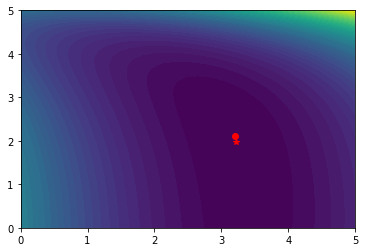

In [34]:
arange = np.linspace(0,5);
brange = np.linspace(0,5);

A,B = np.meshgrid(arange, brange)

def model(X, a, b):
    'Nested function for the model'
    x1 = X[:, 0]
    x2 = X[:, 1]

    f = a * x1 + x2**b
    return f

@np.vectorize
def errfunc(a, b):
    # function for the summed squared error
    fit = model(X, a, b)
    sse = np.sum((fit - f)**2)
    return sse

SSE = errfunc(A, B)

plt.contourf(A, B, SSE, 50)
plt.plot([3.2], [2.1], 'ro')

guesses = [3.18, 2.02]

from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, X, f, guesses)
print(popt)

plt.plot([popt[0]], [popt[1]], 'r*')


print(model(X, *popt))

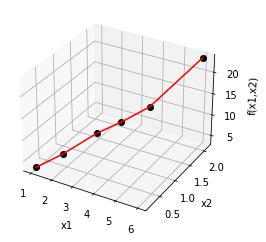

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot(x1, x2, f, 'ko', label='data')
ax.plot(x1, x2, model(X, *popt), 'r-', label='fit')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)');

It can be difficult to figure out initial guesses for nonlinear fitting problems. For one and two dimensional systems, graphical techniques may be useful to visualize how the summed squared error between the model and data depends on the parameters.



## Fitting a numerical ODE solution to data



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/29/fitting-a-numerical-ode-solution-to-data/)

Suppose we know the concentration of A follows this differential equation: $\frac{dC_A}{dt} = -k C_A$, and we have data we want to fit to it. Here is an example of doing that.



[2.58893455]


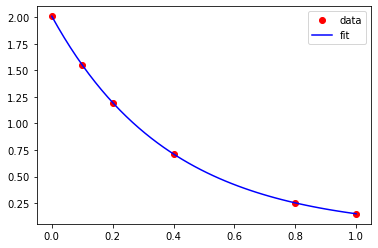

In [36]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint

# given data we want to fit
tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
Ca_data = [2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]

def fitfunc(t, k):
    'Function that returns Ca computed from an ODE for a k'
    def myode(Ca, t):
        return -k * Ca

    Ca0 = Ca_data[0]
    Casol = odeint(myode, Ca0, t)
    return Casol[:,0]

k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0=1.3)
print(k_fit)

tfit = np.linspace(0,1);
fit = fitfunc(tfit, k_fit)

import matplotlib.pyplot as plt
plt.plot(tspan, Ca_data, 'ro', label='data')
plt.plot(tfit, fit, 'b-', label='fit')
plt.legend(loc='best');

## Reading in delimited text files



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/07/reading-in-delimited-text-files/)

sometimes you will get data in a delimited text file format, .e.g. separated by commas or tabs. Matlab can read these in easily. Suppose we have a file containing this data:

    1   3
    3   4
    5   6
    4   8

It is easy to read this directly into variables like this:



In [37]:
import numpy as np

x,y = np.loadtxt('data/testdata.txt', unpack=True)

print(x, y)

[1. 3. 5. 4.] [3. 4. 6. 8.]
